In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**LINKS OF WHERE I GOT THE DATABASES** 
[Public_plans dataset](https://www.kaggle.com/datasets/meepbobeep/us-public-pensions-data-fiscal-years-20012016)

[Multiemplyer_plans database](https://www.kaggle.com/datasets/thedevastator/active-multiemployer-pension-plans-insured-by-pb)

In [42]:
public_plans = pd.read_csv('C:/Users/ngcob/Documents/Pension.zip')
multiemployer_plans = pd.read_csv('C:/Users/ngcob/Documents/Multiemployer.zip')
data = pd.concat([public_plans, multiemployer_plans], ignore_index=True)

In [43]:
print(public_plans)
print(multiemployer_plans)


      index                   MULTIEMPLOYER Plan Name  \
0         0   1199 Seiu Greater New York Pension Fund   
1         1  1199 Seiu Home Care Employees Pension Fu   
2         2           1199 Seiu Regional Pension Fund   
3         3       143 Ibew Benefit Funds-Pension Fund   
4         4            32 Bj Connecticut Pension Fund   
...     ...                                       ...   
1397   1397         Wldw Union Local 1-D Pension Fund   
1398   1398    Wood Wire & Metal Lathers Pension Plan   
1399   1399  Wv Plumbers & Pipefitters Lcl 152 Pensio   
1400   1400               Wwec Local 863 Pension Plan   
1401   1401      Wyoming Carpenters Employers Pension   

                          Address          City State         Zip        EIN  \
0                    P.O. Box 842      New York    NY       10108  136601940   
1                    P.O. Box 842      New York    NY       10108  133943904   
2     2421 Main Street, Suite 100       Buffalo    NY       14214  16111239

In [44]:
# Handle missing values for numeric columns
numeric_cols = public_plans.select_dtypes(include='number').columns
public_plans[numeric_cols] = public_plans[numeric_cols].fillna(public_plans[numeric_cols].mean())

# Handle missing values for categorical columns
if 'State' in multiemployer_plans.columns:
    multiemployer_plans['State'] = multiemployer_plans['State'].fillna('Unknown')

In [45]:
public_plans.drop(columns=['State'], inplace=True, errors='ignore')  

**DATASET NUMBER ONE**>>provides comprehensive insights into major public pension plans across the U.S., compiling data from their annual reports.
I chose the Public Plans Dataset because it provides financial and demographic insights into U.S. public pension systems, essential for evaluating their sustainability. This dataset aligns with the Two-Pot System's objectives by offering data on assets, liabilities, and beneficiary participation, which are vital for ensuring stable retirement income. Furthermore, its historical coverage allows for trend analysis, enabling informed policy decisions and reforms that support the long-term viability of retirement systems.

**DATASET NUMBER TWO**>>This dataset focuses on multiemployer pension plans insured by the Pension Benefit Guaranty Corporation (PBGC), providing a comprehensive list of plans along with vital identifiers.
I selected it because it offers essential information on pension plans insured by the PBGC, including unique identifiers for easy comparison. This dataset directly supports the Two-Pot System's objectives by enabling stakeholders to assess various pension offerings and their geographical distribution, which is vital for tailored local policy adaptations.It also comprehensive nature facilitates research into multiemployer plans' complexities, informing best practices for their integration into the Two-Pot System, ultimately enhancing retirement security.

In [67]:
print(data.columns)

Index(['index', 'MULTIEMPLOYER Plan Name', 'Address', 'City', 'Zip', 'EIN',
       'PN'],
      dtype='object')


In [69]:
dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced')


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Standardize 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Decision Tree Classifier with class weights
dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8113879003558719
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.83      0.90       269
           2       0.15      0.60      0.24         5
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          74       0.00      0.00      0.00         2
         333       0.33      0.50      0.40         2

    accuracy                           0.81       281
   macro avg       0.18      0.24      0.19       281
weighted avg       0.94      0.81      0.87       281

Confusion Matrix:
 [[224  16   1   0  11   0  15   2]
 [  2   3   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   2   0]
 [  0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0]
 [  2   0   0   0   0   0   0   0]
 [  1   0   0   0   0   0   0   

In [90]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

data['Date'] = pd.date_range(start='2020-01-01', periods=len(data), freq='ME')  # Use 'ME' for monthly frequency
data.set_index('Date', inplace=True)

y = data['PN']

if isinstance(y, pd.Series):
    model = ARIMA(y, order=(1, 1, 1))  # Fit the ARIMA model
    model_fit = model.fit()

    print(model_fit.summary())

    # Forecasting
    n_periods = 12  # Number of periods to forecast
    forecast = model_fit.get_forecast(steps=n_periods)


    plt.figure(figsize=(12, 6))
    
    plt.plot(y, label='Historical Data', color='blue')
    
    plt.plot(forecast.predicted_mean.index, forecast.predicted_mean, label='Forecast', color='red')
    
    plt.fill_between(forecast.predicted_mean.index, 
                     forecast.conf_int()['lower PN'], 
                     forecast.conf_int()['upper PN'], 
                     color='pink', alpha=0.3, label='95% Confidence Interval')
    
    plt.title('ARIMA Analysis of Historical Data for Pension Fund Valuation')
    plt.xlabel('Date')
    plt.ylabel('PN Value')
    plt.legend()
    plt.grid(True)
    plt.show()



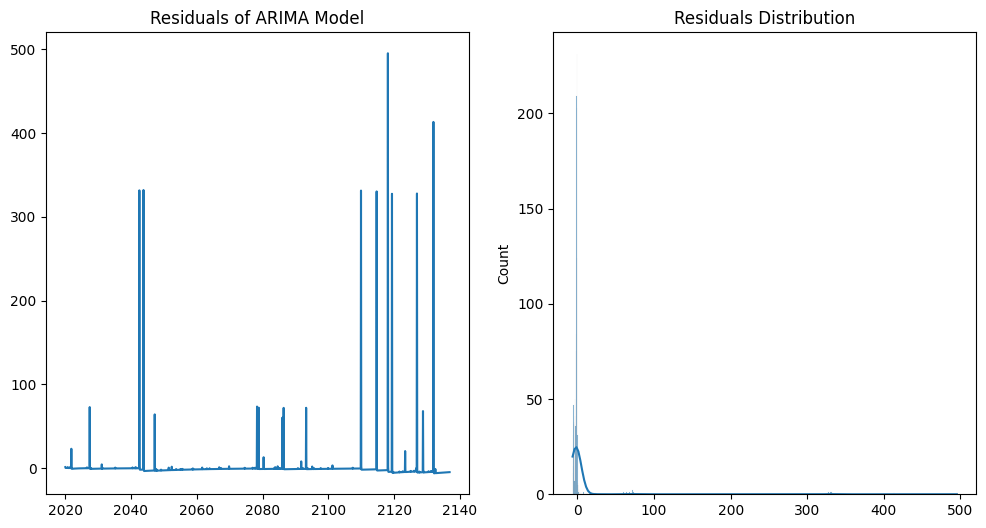

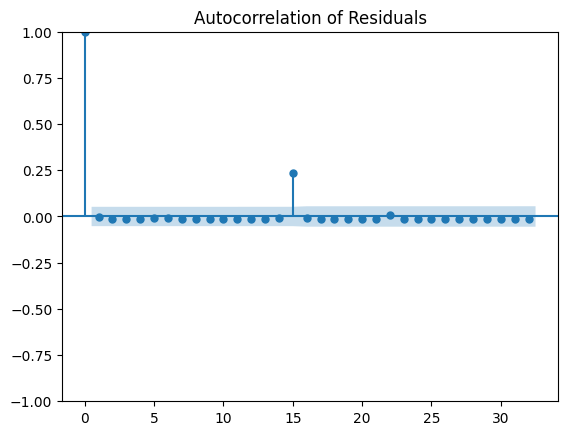

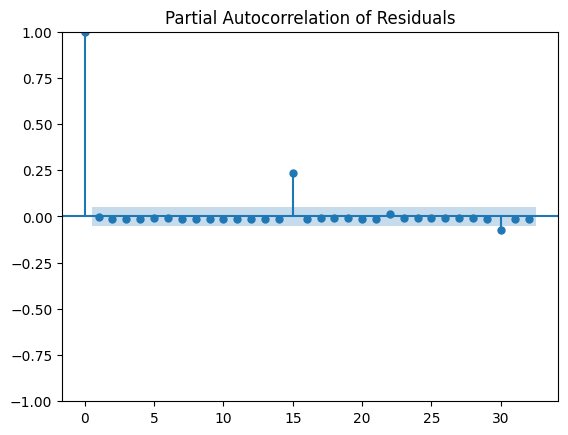

In [83]:
# Residual analysis for ARIMA
residuals = model_fit.resid

plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.subplot(122)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

# Perform a statistical test (e.g., ACF/PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(residuals)
plt.title('Autocorrelation of Residuals')
plt.show()

plot_pacf(residuals)
plt.title('Partial Autocorrelation of Residuals')
plt.show()


C:\Users\ngcob\AppData\Local\Temp\ipykernel_10316\3786045388.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['Date'] = pd.date_range(start='2020-01-01', periods=len(data), freq='M')  # Adjust as needed
12:58:33 - cmdstanpy - INFO - Chain [1] start processing
12:58:33 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ngcob\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


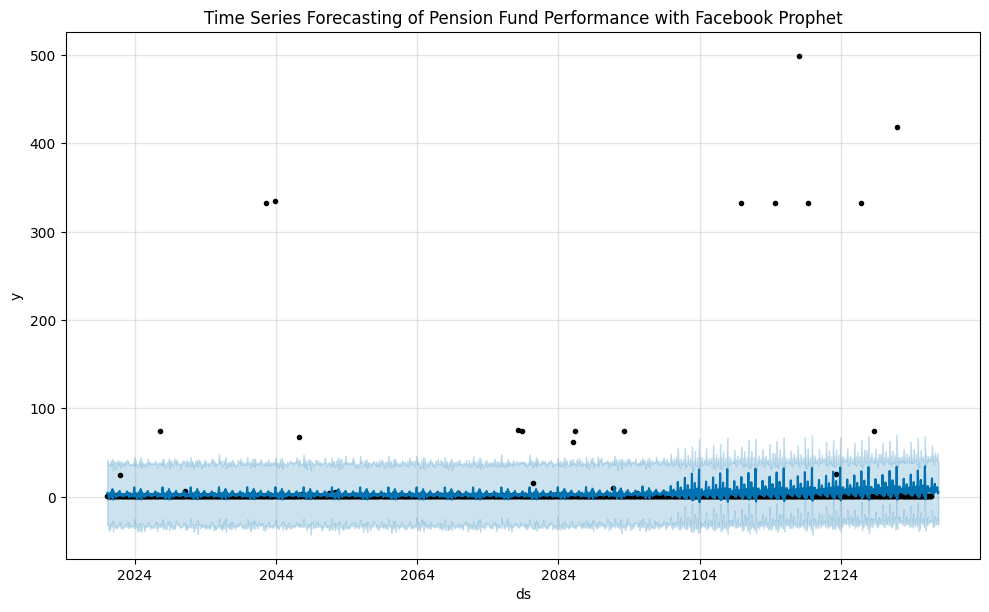

In [76]:
from prophet import Prophet
import matplotlib.pyplot as plt

data['Date'] = pd.date_range(start='2020-01-01', periods=len(data), freq='M')  # Adjust as needed
df = data[['Date', 'PN']].rename(columns={'Date': 'ds', 'PN': 'y'})
model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting for the next 12 months

forecast = model.predict(future)

model.plot(forecast)
plt.title('Time Series Forecasting of Pension Fund Performance with Facebook Prophet')
plt.show()


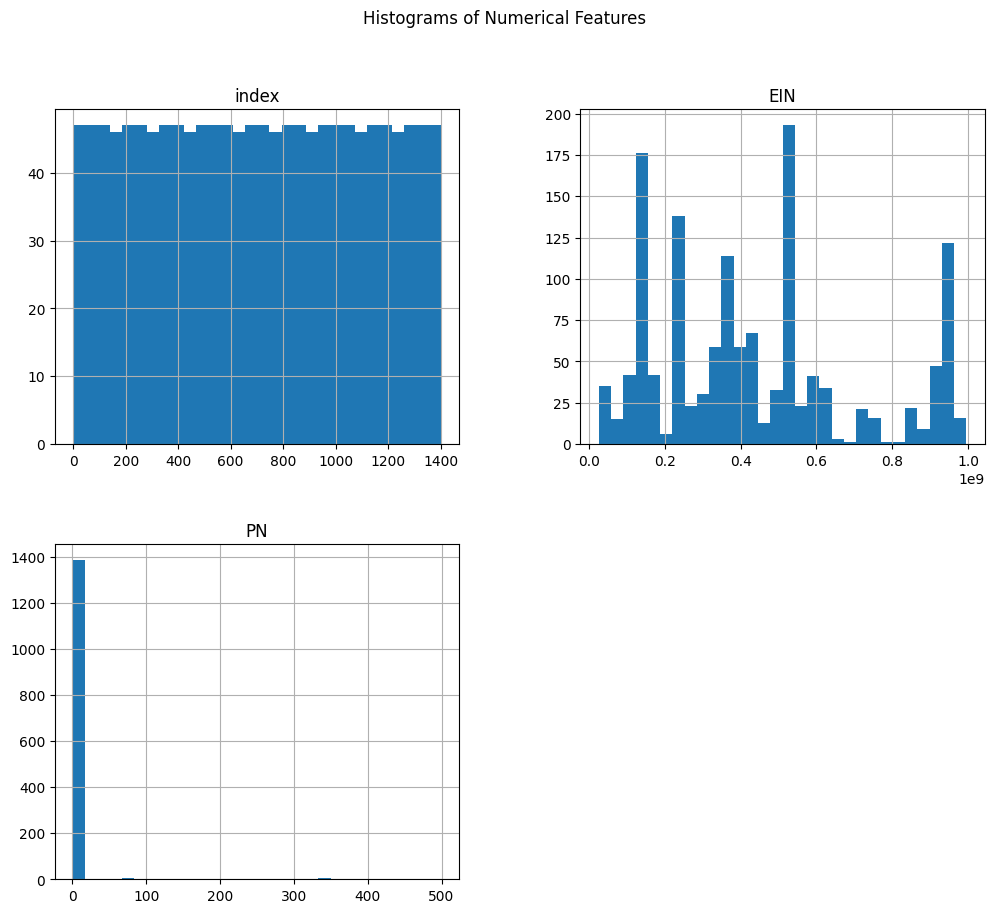

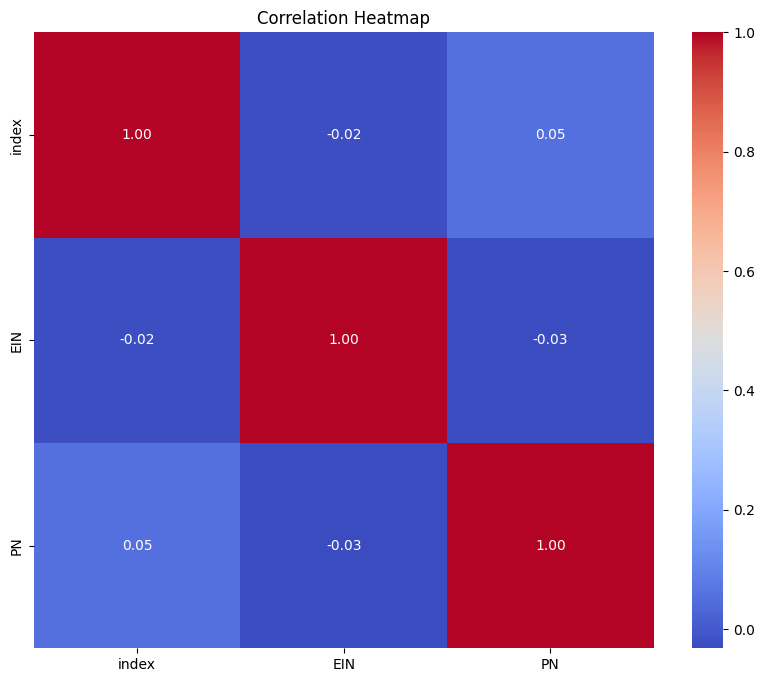

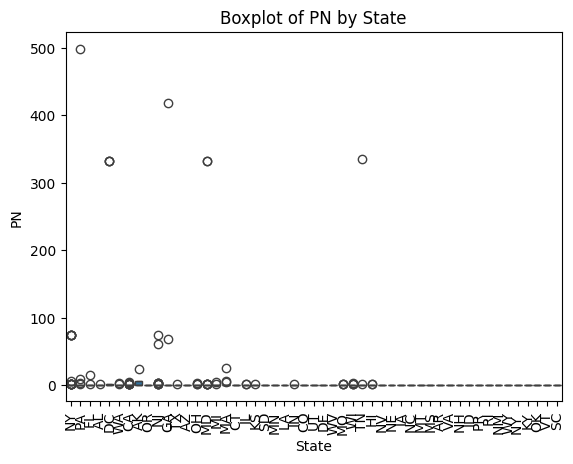

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data.select_dtypes(include='number').columns
data[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.boxplot(x='State', y='PN', data=multiemployer_plans)
plt.title('Boxplot of PN by State')
plt.xticks(rotation=90)
plt.show()


In [78]:

data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
interaction_features = poly.fit_transform(data[numeric_cols])
interaction_df = pd.DataFrame(interaction_features, columns=poly.get_feature_names_out(numeric_cols))
data = pd.concat([data, interaction_df], axis=1)


**ERRORS**
1.C:\Users\ngcob\AppData\Local\Temp\ipykernel_10316\3786045388.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
I have encountered an error regarding the frequency parameter in my date range definitions.Despite attempts to fix this, it persisted because the correct frequency value wasn’t used,and i just dont understand and how else to do to fix it...

The Arima code wont display anything,no graph no error so it hard for me to see were i went wrong so that i can try to fix the mistake...

**SENTIMENT ANALYSIS**
The process of sentiment analysis would begin with gathering employee feedback through methods such as surveys or interviews focusing on the Two-pot system.After collecting the feedback,I would preprocess the text data,like cleaning the data to remove any irrelevant information and then do Normalization of the text.

Next,I  would classify the sentiments expressed in the feedback. This could be done using lexicon-based methods, which rely on predefined lists of words associated with different sentiments, or through machine learning models that analyze labeled data to predict sentiment. The goal here is to categorize the feedback as positive, negative, or neutral.

Once the sentiment analysis is completed,I would interpret the results. Positive sentiments would indicate favorable views about the Two-pot system, highlighting aspects that employees appreciate.Then negative sentiments would reveal concerns or criticisms, suggesting areas that may require improvement. Neutral sentiments might reflect indifference indicating that further information may be needed to engage employees more effectively. 

All in all, this analysis would provide valuable insights into workforce perceptions of the Two-pot system, allowing organizations to make informed decisions regarding policy adjustments, enhance employee satisfaction, and foster a more responsive organizational environment. By understanding how employees feel about the pension plans in this dataset, organizations can work towards improving their offerings and addressing any concerns raised.